In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [2]:
policy = random_policy()
episode = run_episode(policy)

In [5]:
for i, state in enumerate(episode.visited[:-1]):
    action = policy[state]
    next_state = episode.visited[i+1]
    print(action.abx == next_state.abx and action.vaso == next_state.vaso and action.vent == next_state.vent)
    

True


In [6]:
state = STATES[7]# random_initial_state()
state

State(hr=-1, bp=-1, o2=-1, glu=-2, diabetic=True, abx=False, vaso=False, vent=False)

In [7]:
action = ACTIONS[len(ACTIONS) - 1]
action

Action(abx=False, vaso=False, vent=False)

In [8]:
fluctuations = [state_to_index[get_next_state(TRUE_ENV_PARAMS, state, action)] for _ in range(100)]
fluctuations

[7,
 167,
 167,
 167,
 87,
 7,
 87,
 167,
 7,
 7,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 23,
 7,
 7,
 7,
 7,
 503,
 23,
 7,
 167,
 7,
 7,
 7,
 7,
 7,
 183,
 23,
 7,
 7,
 7,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 167,
 7,
 487,
 7,
 487,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 487,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 7,
 23,
 7,
 7,
 7,
 7,
 503,
 167,
 7,
 7,
 7,
 7,
 23,
 87,
 7,
 487,
 7,
 7,
 7,
 7,
 7,
 7,
 87,
 23,
 7,
 247,
 7,
 7]

In [9]:
policy = random_policy()

In [10]:
episode = run_episode(policy)

In [11]:
episode.visited

[State(hr=0, bp=0, o2=-1, glu=-1, diabetic=False, abx=False, vaso=False, vent=False),
 State(hr=0, bp=0, o2=0, glu=-1, diabetic=False, abx=True, vaso=True, vent=True),
 State(hr=0, bp=0, o2=0, glu=-1, diabetic=False, abx=True, vaso=False, vent=True),
 State(hr=0, bp=0, o2=0, glu=-1, diabetic=False, abx=False, vaso=False, vent=True),
 State(hr=0, bp=1, o2=0, glu=-1, diabetic=False, abx=True, vaso=True, vent=False),
 State(hr=0, bp=1, o2=0, glu=-1, diabetic=False, abx=False, vaso=False, vent=True),
 State(hr=-1, bp=1, o2=-1, glu=-2, diabetic=False, abx=False, vaso=False, vent=False)]

In [12]:
episode.rewards

[0, 0, 0, 0, 0, -1]

In [13]:
dqn_training = train_dqn(true_env, 100_000, "Test")
# dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")

In [14]:
# ppo_training = train_ppo(true_env, 100_000, "Test")
ppo_training = Training.load("data/trainings/PPO-Test_object.pkl")

Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


In [16]:
# # to test whether one model has a unique policy

# import hashlib

# def hash_policy(policy):
#     policy_str = ''.join(map(str, policy))
#     return hashlib.md5(policy_str.encode()).hexdigest()

# # Hash the policies
# hashed_policies = [hash_policy(get_pol(training)) for _ in range(100)]

# # Find differences
# unique_hashes = set(hashed_policies)
# print(f"Number of unique policies: {len(unique_hashes)}")


# # output: Number of unique policies: 1

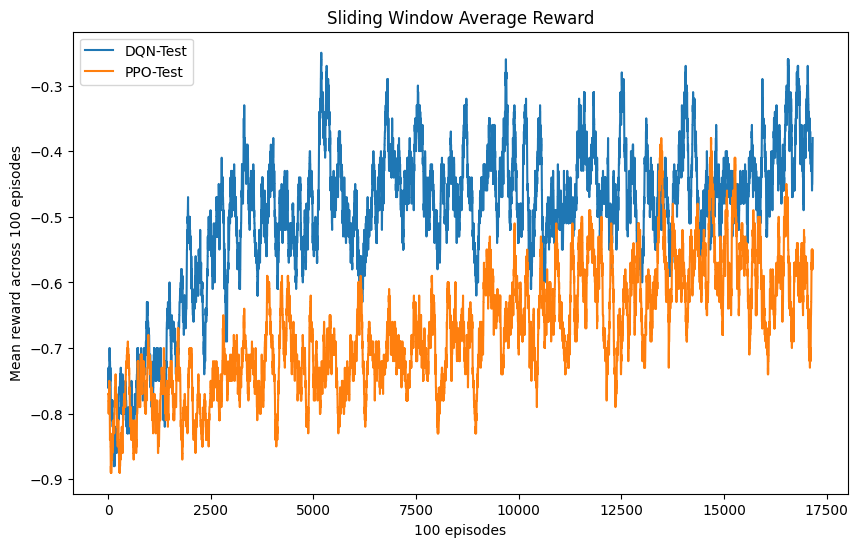

In [18]:
plot_rewards([dqn_training, ppo_training], len(dqn_training.episodes), )

In [ ]:
dqn_training.evaluate_policy(100000)


-0.37948

In [ ]:
ppo_training.evaluate_policy(100000)

-0.47961

In [21]:
# dqn_1M_training = train_dqn(true_env, 1_000_000, "Test-1M")
dqn_1M_training = Training.load("data/trainings/DQN-Test-1M_object.pkl")
# ppo_1M_training = train_ppo(true_env, 1_000_000, "Test-1M")
ppo_1M_training = Training.load("data/trainings/PPO-Test-1M_object.pkl")


Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


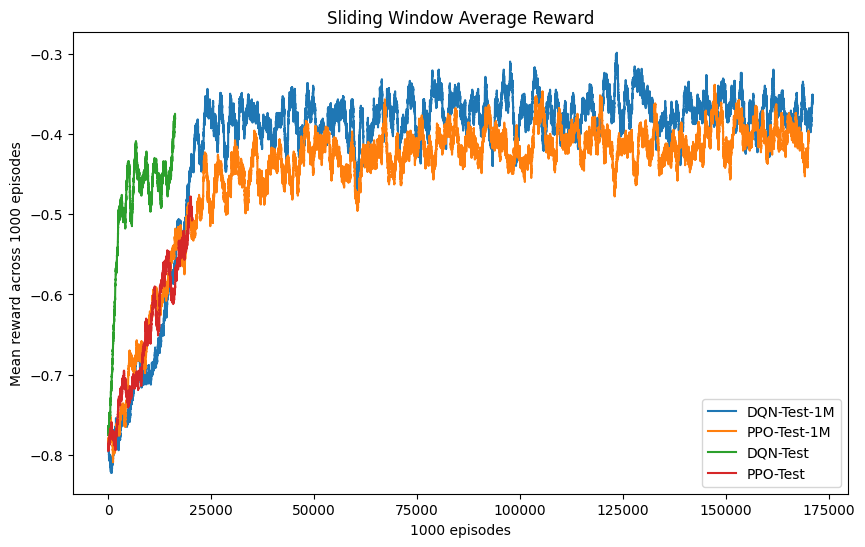

In [22]:
plot_rewards([dqn_1M_training, ppo_1M_training, dqn_training, ppo_training], len(dqn_1M_training.episodes), 1000)
